<a href="https://colab.research.google.com/github/ayushbhotika/stockMarketPrediction/blob/main/SP500_AutoArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Time Series Forecasting Analysis**

This notebook examines several time series forecasting models applied to S&P 500 closing prices.

# Data Loading and Preparation



*   Loaded the S&P 500 closing price data
from the file 'SP_500.csv'.  
*  Converted the 'Date' column to datetime format and set it as the DataFrame index.  
*  Handled duplicate entries by removing duplicate rows.


# Exploratory Data Analysis  

*   Visualized the distribution of closing prices through histogram and boxplot charts.  


# Stationarity Testing  
* Conducted the Augmented Dickey-Fuller (ADF) test on the original closing price series.

* The ADF test showed that the original series is non-stationary (p-value > 0.05).

* Applied first-order differencing to make the data stationary.

* Confirmed stationarity on the differenced data with the ADF test (p-value < 0.05).

# Autocorrelation and Partial Autocorrelation Analysis  
* Plotted the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the differenced data.  

* The plots suggested ARIMA model parameters, specifically ARIMA(1, 1, 1), due to significant spikes at lag 1 in both plots.

# Forecasting Model Implementation and Evaluation
  
Implemented and assessed the following forecasting models:

1. Naive Forecast: Used the previous day’s closing price as the forecast.  
* Evaluated performance with MSE, RMSE, and MAPE.  
* Visualized forecasts alongside actual values.

2.  Moving Average (MA) Models: Calculated the average of closing prices over 3-day, 5-day, and 7-day windows.  
* Evaluated each model using MSE, RMSE, and MAPE.  
* Plotted each forecast against actual values.  
* Plotted all MA forecasts together for comparison.

3.  Exponential Smoothing Models: Applied Simple, Double, and Triple Exponential Smoothing with optimized parameters.  
* Evaluated models using MSE, RMSE, and MAPE.  
* Displayed optimized smoothing parameters (alpha, beta, gamma).  
* Visualized each forecast against actual values.  
* Plotted all exponential smoothing forecasts together for comparison.

4. ARIMA(1,1,1) Model: Fitted an ARIMA model of order (1, 1, 1) based on ACF and PACF insights.  
* Performed diagnostic tests (Ljung-Box, Jarque-Bera, Heteroskedasticity), which indicated the model captured linear dependencies but residuals were not normally distributed and showed heteroskedasticity.  
* Visualized residuals through time series plot, histogram, and Q-Q plot to confirm these properties.  
* Evaluated the model with MSE, RMSE, and MAPE.



In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/SP_500.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.set_index('Date', inplace=True)
df.head()

,Close
Date,
2015-06-29,2057.639893
2015-06-30,2063.110107
2015-07-01,2077.419922
2015-07-02,2076.780029
2015-07-06,2068.760010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-06-29 to 2020-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1259.0,2541.105574,377.634688,1829.079956,2167.184936,2582.610107,2840.475098,3386.149902


In [12]:
# Find and display duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
display(duplicate_rows)

# Display the count of duplicate rows (optional, as it was already done)
print("\nNumber of duplicate rows:", df.duplicated().sum())

Duplicate Rows:


,Close
Date,
2016-04-06,2066.659912
2016-05-16,2066.659912
2017-01-09,2268.899902
2017-01-10,2268.899902
2017-03-13,2373.469971
2017-03-20,2373.469971
2017-06-02,2439.070068
2017-06-26,2439.070068
2018-03-12,2783.020020



Number of duplicate rows: 7


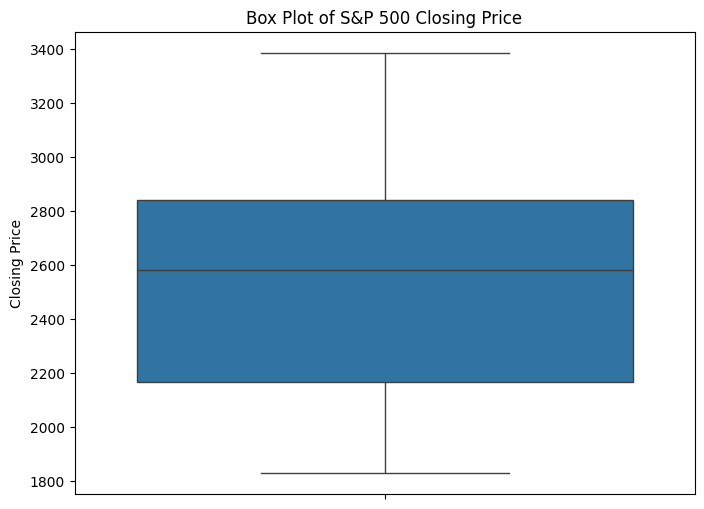

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Close'])
plt.title('Box Plot of S&P 500 Closing Price')
plt.ylabel('Closing Price')
plt.show()

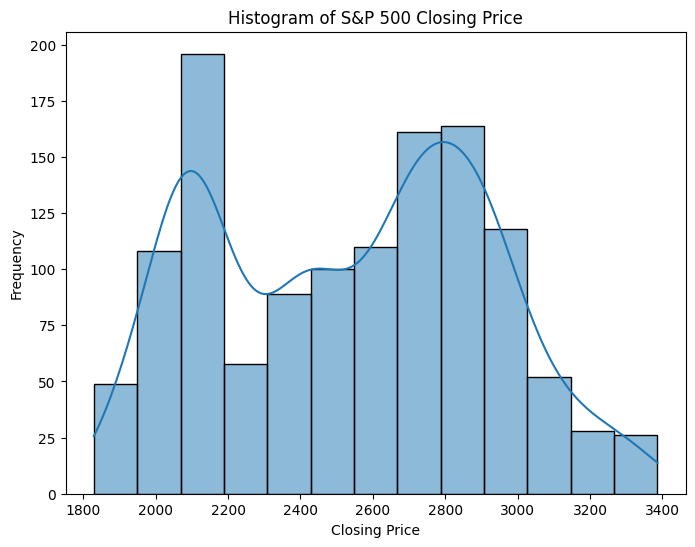

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Close'], kde=True)
plt.title('Histogram of S&P 500 Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Implement Naive Forecasting
df['Naive_Forecast'] = df['Close'].shift(1)

# Display the original data and the naive forecast
print("Original Data and Naive Forecast:")
display(df.head())

# Note: The first value of Naive_Forecast will be NaN as there is no previous value.

Original Data and Naive Forecast:


,Close,Naive_Forecast
Date,,
2015-06-29,2057.639893,NaN
2015-06-30,2063.110107,2057.639893
2015-07-01,2077.419922,2063.110107
2015-07-02,2076.780029,2077.419922
2015-07-06,2068.760010,2076.780029


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop the first row as it has a NaN value for Naive_Forecast
df_eval = df.dropna()

# Calculate MSE
mse = mean_squared_error(df_eval['Close'], df_eval['Naive_Forecast'])
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAPE
# Avoid division by zero in MAPE calculation
mape = np.mean(np.abs((df_eval['Close'] - df_eval['Naive_Forecast']) / df_eval['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Squared Error (MSE): 1009.9332574266513
Root Mean Squared Error (RMSE): 31.7794470912672
Mean Absolute Percentage Error (MAPE): 0.7104721111638954%


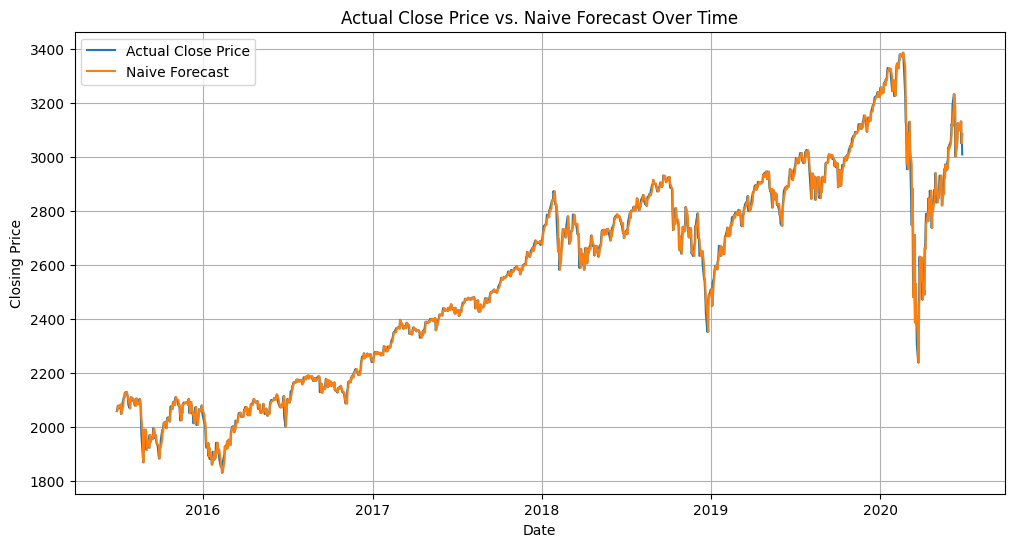

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['Naive_Forecast'], label='Naive Forecast')
plt.title('Actual Close Price vs. Naive Forecast Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Calculate the 3-day moving average
df['3_day_MA'] = df['Close'].rolling(window=3).mean()

# Display the head of the DataFrame to see the new column
display(df.head())

,Close,Naive_Forecast,3_day_MA
Date,,,
2015-06-29,2057.639893,NaN,NaN
2015-06-30,2063.110107,2057.639893,NaN
2015-07-01,2077.419922,2063.110107,2066.056641
2015-07-02,2076.780029,2077.419922,2072.436686
2015-07-06,2068.760010,2076.780029,2074.319987


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in '3_day_MA' (the first two rows)
df_eval_ma = df.dropna(subset=['3_day_MA'])

# Calculate MSE for 3-day Moving Average
mse_ma = mean_squared_error(df_eval_ma['Close'], df_eval_ma['3_day_MA'])
print(f"Mean Squared Error (MSE) for 3-day Moving Average: {mse_ma}")

# Calculate RMSE for 3-day Moving Average
rmse_ma = np.sqrt(mse_ma)
print(f"Root Mean Squared Error (RMSE) for 3-day Moving Average: {rmse_ma}")

# Calculate MAPE for 3-day Moving Average
# Avoid division by zero in MAPE calculation
mape_ma = np.mean(np.abs((df_eval_ma['Close'] - df_eval_ma['3_day_MA']) / df_eval_ma['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for 3-day Moving Average: {mape_ma}%")

Mean Squared Error (MSE) for 3-day Moving Average: 463.65391767810274
Root Mean Squared Error (RMSE) for 3-day Moving Average: 21.532624495822677
Mean Absolute Percentage Error (MAPE) for 3-day Moving Average: 0.5109883167108256%


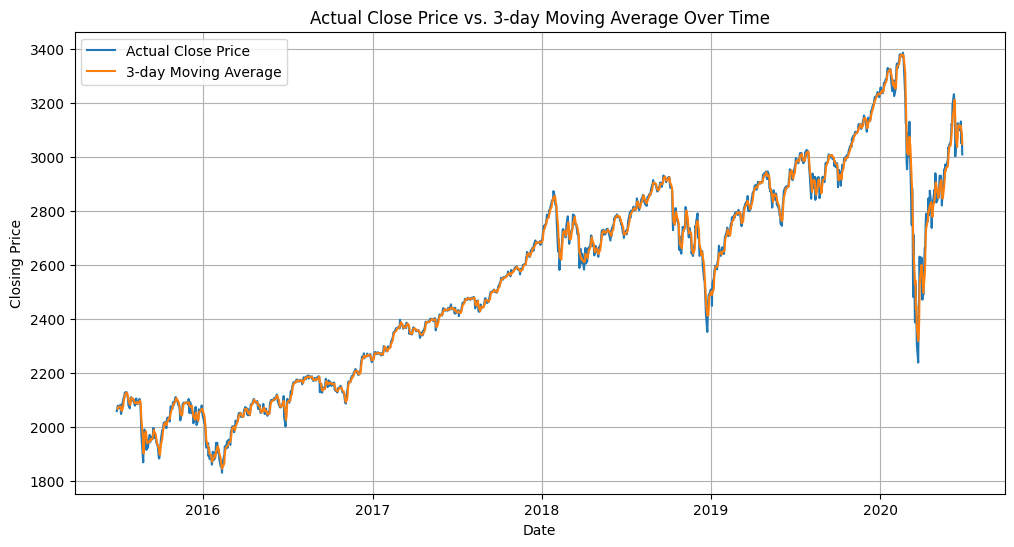

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['3_day_MA'], label='3-day Moving Average')
plt.title('Actual Close Price vs. 3-day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Calculate the 5-day moving average
df['5_day_MA'] = df['Close'].rolling(window=5).mean()

# Display the head of the DataFrame to see the new column
print("DataFrame head with 5-day Moving Average:")
display(df.head())

DataFrame head with 5-day Moving Average:


,Close,Naive_Forecast,3_day_MA,5_day_MA
Date,,,,
2015-06-29,2057.639893,NaN,NaN,NaN
2015-06-30,2063.110107,2057.639893,NaN,NaN
2015-07-01,2077.419922,2063.110107,2066.056641,NaN
2015-07-02,2076.780029,2077.419922,2072.436686,NaN
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in '5_day_MA' (the first four rows)
df_eval_ma_5 = df.dropna(subset=['5_day_MA'])

# Calculate MSE for 5-day Moving Average
mse_ma_5 = mean_squared_error(df_eval_ma_5['Close'], df_eval_ma_5['5_day_MA'])
print(f"Mean Squared Error (MSE) for 5-day Moving Average: {mse_ma_5}")

# Calculate RMSE for 5-day Moving Average
rmse_ma_5 = np.sqrt(mse_ma_5)
print(f"Root Mean Squared Error (RMSE) for 5-day Moving Average: {rmse_ma_5}")

# Calculate MAPE for 5-day Moving Average
# Avoid division by zero in MAPE calculation
mape_ma_5 = np.mean(np.abs((df_eval_ma_5['Close'] - df_eval_ma_5['5_day_MA']) / df_eval_ma_5['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for 5-day Moving Average: {mape_ma_5}%")

Mean Squared Error (MSE) for 5-day Moving Average: 997.5393686122745
Root Mean Squared Error (RMSE) for 5-day Moving Average: 31.583846640526144
Mean Absolute Percentage Error (MAPE) for 5-day Moving Average: 0.7631635311499972%


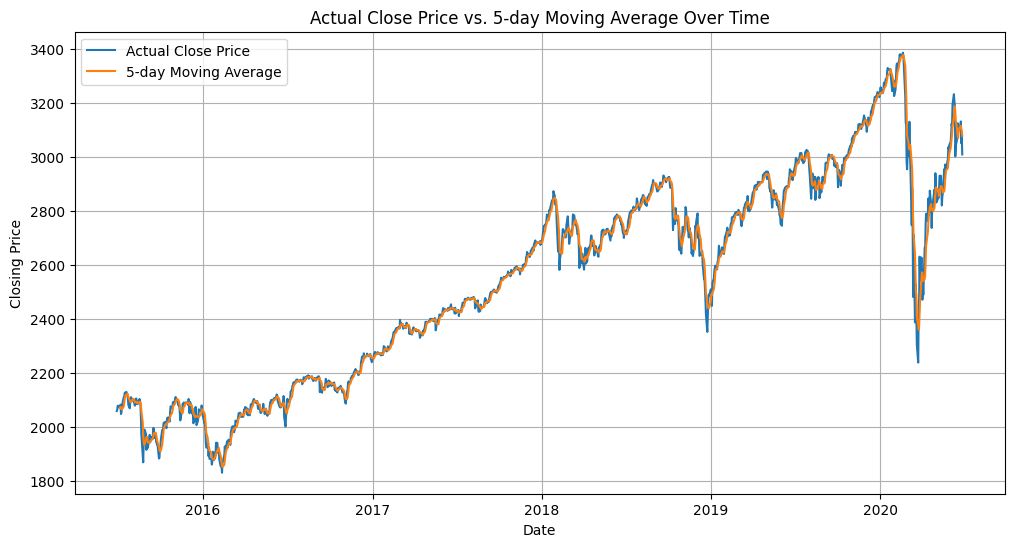

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['5_day_MA'], label='5-day Moving Average')
plt.title('Actual Close Price vs. 5-day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate the 7-day moving average
df['7_day_MA'] = df['Close'].rolling(window=7).mean()

# Display the head of the DataFrame to see the new column
print("DataFrame head with 7-day Moving Average:")
display(df.head())

DataFrame head with 7-day Moving Average:


,Close,Naive_Forecast,3_day_MA,5_day_MA,7_day_MA
Date,,,,,
2015-06-29,2057.639893,NaN,NaN,NaN,NaN
2015-06-30,2063.110107,2057.639893,NaN,NaN,NaN
2015-07-01,2077.419922,2063.110107,2066.056641,NaN,NaN
2015-07-02,2076.780029,2077.419922,2072.436686,NaN,NaN
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992,NaN


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in '7_day_MA' (the first six rows)
df_eval_ma_7 = df.dropna(subset=['7_day_MA'])

# Calculate MSE for 7-day Moving Average
mse_ma_7 = mean_squared_error(df_eval_ma_7['Close'], df_eval_ma_7['7_day_MA'])
print(f"Mean Squared Error (MSE) for 7-day Moving Average: {mse_ma_7}")

# Calculate RMSE for 7-day Moving Average
rmse_ma_7 = np.sqrt(mse_ma_7)
print(f"Root Mean Squared Error (RMSE) for 7-day Moving Average: {rmse_ma_7}")

# Calculate MAPE for 7-day Moving Average
# Avoid division by zero in MAPE calculation
mape_ma_7 = np.mean(np.abs((df_eval_ma_7['Close'] - df_eval_ma_7['7_day_MA']) / df_eval_ma_7['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for 7-day Moving Average: {mape_ma_7}%")

Mean Squared Error (MSE) for 7-day Moving Average: 1532.1500365269753
Root Mean Squared Error (RMSE) for 7-day Moving Average: 39.142688161736864
Mean Absolute Percentage Error (MAPE) for 7-day Moving Average: 0.9469810897982782%


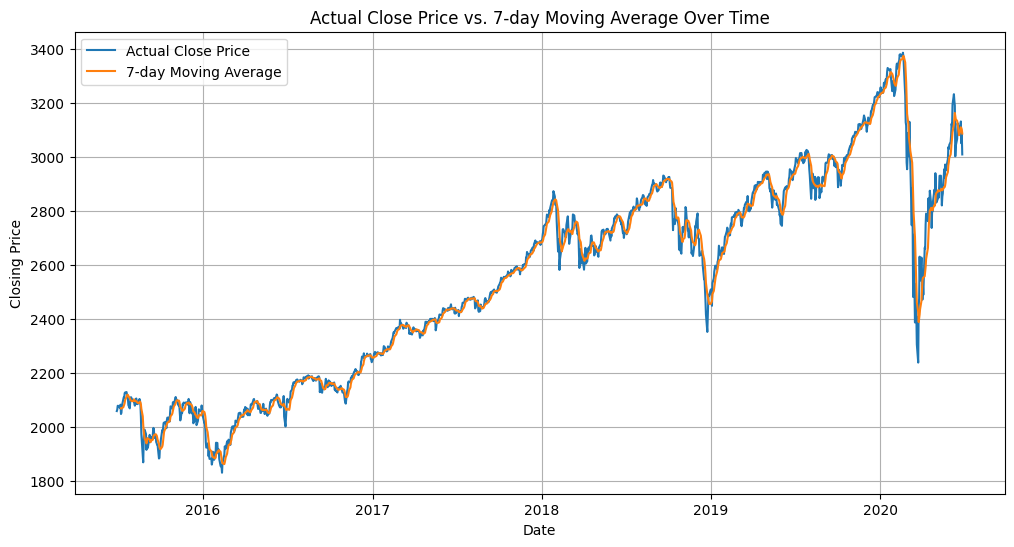

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['7_day_MA'], label='7-day Moving Average')
plt.title('Actual Close Price vs. 7-day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

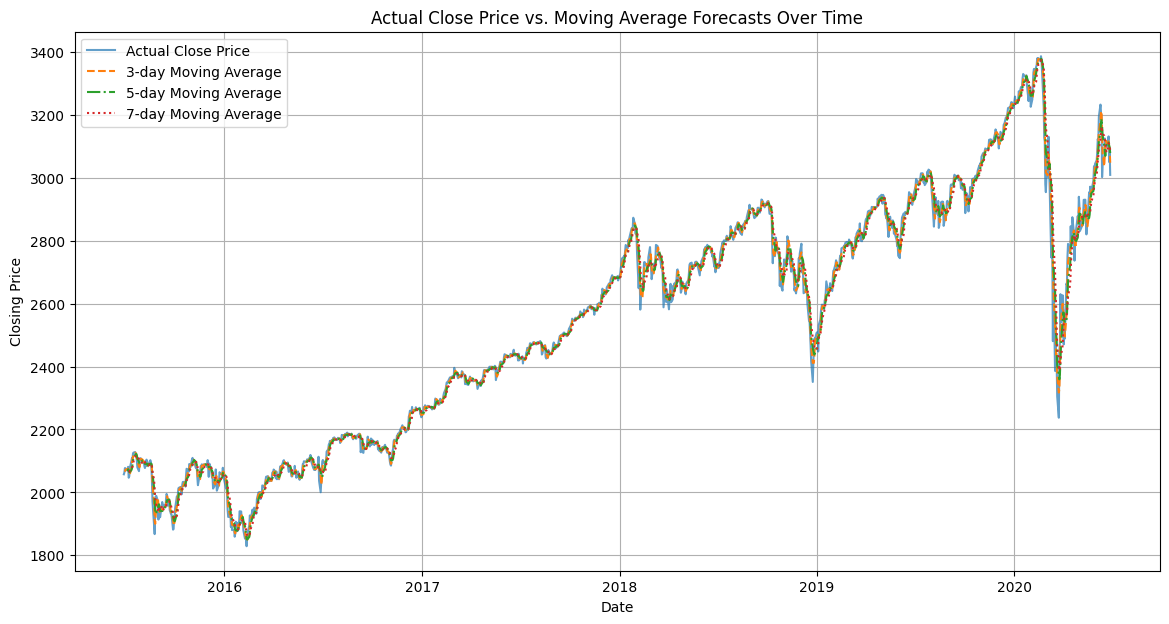

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price', alpha=0.7)
plt.plot(df.index, df['3_day_MA'], label='3-day Moving Average', linestyle='--')
plt.plot(df.index, df['5_day_MA'], label='5-day Moving Average', linestyle='-.')
plt.plot(df.index, df['7_day_MA'], label='7-day Moving Average', linestyle=':')
plt.title('Actual Close Price vs. Moving Average Forecasts Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply Simple Exponential Smoothing with optimized alpha
ses_model = SimpleExpSmoothing(df['Close'])
fit1 = ses_model.fit(optimized=True)

# Add the fitted values (forecasts) as a new column to the DataFrame
df['SES_Optimized_Forecast'] = fit1.fittedvalues

# Display the head of the DataFrame to see the new column
print("DataFrame head with SES Optimized Forecast:")
display(df.head())

DataFrame head with SES Optimized Forecast:


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close,Naive_Forecast,3_day_MA,5_day_MA,7_day_MA,SES_Optimized_Forecast
Date,,,,,,
2015-06-29,2057.639893,NaN,NaN,NaN,NaN,2057.639893
2015-06-30,2063.110107,2057.639893,NaN,NaN,NaN,2057.639893
2015-07-01,2077.419922,2063.110107,2066.056641,NaN,NaN,2062.164863
2015-07-02,2076.780029,2077.419922,2072.436686,NaN,NaN,2074.783873
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992,NaN,2076.435097


In [29]:
# Print the optimized alpha value
print(f"Optimized alpha value: {fit1.params['smoothing_level']}")

Optimized alpha value: 0.8272016560942538


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in 'SES_Optimized_Forecast'
df_eval_ses = df.dropna(subset=['SES_Optimized_Forecast'])

# Calculate MSE for SES Optimized Forecast
mse_ses = mean_squared_error(df_eval_ses['Close'], df_eval_ses['SES_Optimized_Forecast'])
print(f"Mean Squared Error (MSE) for Simple Exponential Smoothing: {mse_ses}")

# Calculate RMSE for SES Optimized Forecast
rmse_ses = np.sqrt(mse_ses)
print(f"Root Mean Squared Error (RMSE) for Simple Exponential Smoothing: {rmse_ses}")

# Calculate MAPE for SES Optimized Forecast
# Avoid division by zero in MAPE calculation
mape_ses = np.mean(np.abs((df_eval_ses['Close'] - df_eval_ses['SES_Optimized_Forecast']) / df_eval_ses['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for Simple Exponential Smoothing: {mape_ses}%")

Mean Squared Error (MSE) for Simple Exponential Smoothing: 971.4097429066425
Root Mean Squared Error (RMSE) for Simple Exponential Smoothing: 31.16744684613487
Mean Absolute Percentage Error (MAPE) for Simple Exponential Smoothing: 0.7097979878006043%


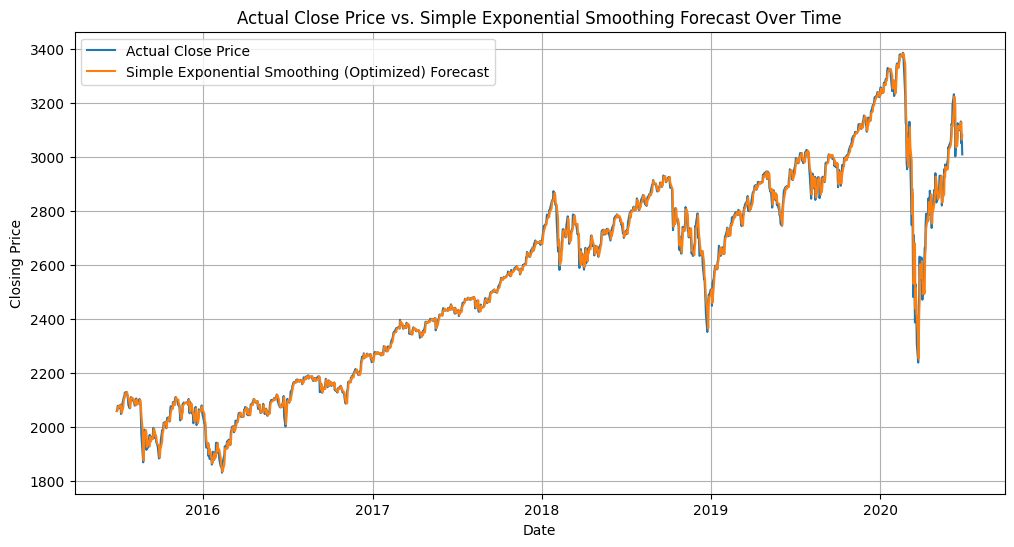

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['SES_Optimized_Forecast'], label='Simple Exponential Smoothing (Optimized) Forecast')
plt.title('Actual Close Price vs. Simple Exponential Smoothing Forecast Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from statsmodels.tsa.holtwinters import Holt

# Apply Double Exponential Smoothing (Holt's method) with optimized alpha and beta
des_model = Holt(df['Close'])
fit2 = des_model.fit(optimized=True)

# Add the fitted values (forecasts) as a new column to the DataFrame
df['DES_Optimized_Forecast'] = fit2.fittedvalues

# Display the head of the DataFrame to see the new column
print("DataFrame head with DES Optimized Forecast:")
display(df.head())

DataFrame head with DES Optimized Forecast:


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close,Naive_Forecast,3_day_MA,5_day_MA,7_day_MA,SES_Optimized_Forecast,DES_Optimized_Forecast,TES_Optimized_Forecast,Close_Difference
Date,,,,,,,,,
2015-06-29,2057.639893,NaN,NaN,NaN,NaN,2057.639893,2063.110107,2056.787348,NaN
2015-06-30,2063.110107,2057.639893,NaN,NaN,NaN,2057.639893,2064.021777,2056.041045,5.470214
2015-07-01,2077.419922,2063.110107,2066.056641,NaN,NaN,2062.164863,2068.714513,2063.345637,14.309815
2015-07-02,2076.780029,2077.419922,2072.436686,NaN,NaN,2074.783873,2081.418581,2076.431775,-0.639893
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992,NaN,2076.435097,2083.030846,2076.824808,-8.020019


In [46]:
# Print the optimized alpha and beta values
print(f"Optimized alpha value: {fit2.params['smoothing_level']}")
print(f"Optimized beta value: {fit2.params['smoothing_trend']}")

Optimized alpha value: 0.8300948676289363
Optimized beta value: 0.003908434002961095


In [47]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in 'DES_Optimized_Forecast'
df_eval_des = df.dropna(subset=['DES_Optimized_Forecast'])

# Calculate MSE for DES Optimized Forecast
mse_des = mean_squared_error(df_eval_des['Close'], df_eval_des['DES_Optimized_Forecast'])
print(f"Mean Squared Error (MSE) for Double Exponential Smoothing: {mse_des}")

# Calculate RMSE for DES Optimized Forecast
rmse_des = np.sqrt(mse_des)
print(f"Root Mean Squared Error (RMSE) for Double Exponential Smoothing: {rmse_des}")

# Calculate MAPE for DES Optimized Forecast
# Avoid division by zero in MAPE calculation
mape_des = np.mean(np.abs((df_eval_des['Close'] - df_eval_des['DES_Optimized_Forecast']) / df_eval_des['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for Double Exponential Smoothing: {mape_des}%")

Mean Squared Error (MSE) for Double Exponential Smoothing: 977.6588711247001
Root Mean Squared Error (RMSE) for Double Exponential Smoothing: 31.267537017243622
Mean Absolute Percentage Error (MAPE) for Double Exponential Smoothing: 0.711606346206706%


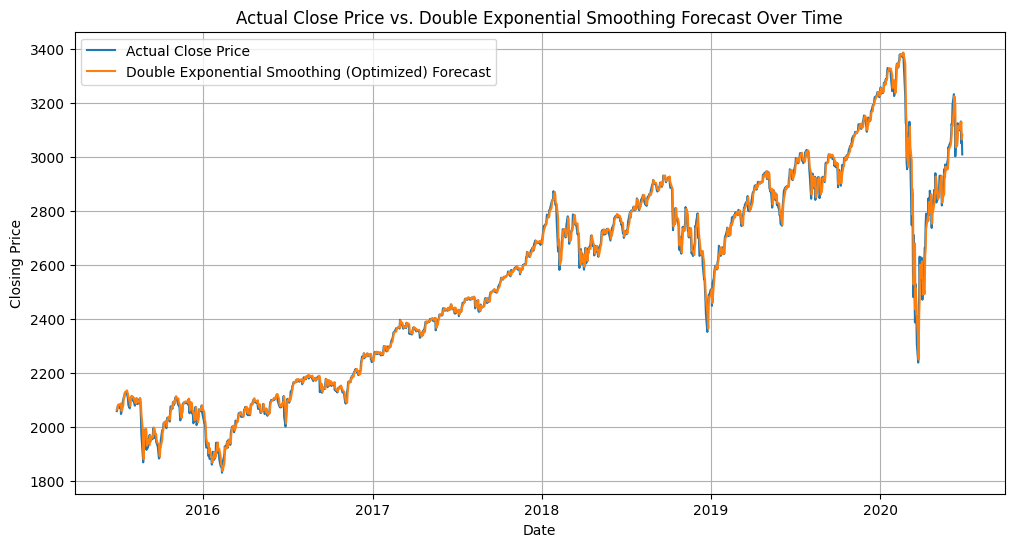

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['DES_Optimized_Forecast'], label='Double Exponential Smoothing (Optimized) Forecast')
plt.title('Actual Close Price vs. Double Exponential Smoothing Forecast Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Triple Exponential Smoothing (Holt-Winters method) with optimized parameters
# Assuming a seasonal period of 5 (e.g., for weekly data if each data point is a trading day)
tes_model = ExponentialSmoothing(df['Close'], seasonal_periods=5, trend='add', seasonal='add')
fit3 = tes_model.fit(optimized=True)

# Add the fitted values (forecasts) as a new column to the DataFrame
df['TES_Optimized_Forecast'] = fit3.fittedvalues

# Display the head of the DataFrame to see the new column
print("DataFrame head with TES Optimized Forecast:")
display(df.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


DataFrame head with TES Optimized Forecast:


,Close,Naive_Forecast,3_day_MA,5_day_MA,7_day_MA,SES_Optimized_Forecast,DES_Optimized_Forecast,TES_Optimized_Forecast
Date,,,,,,,,
2015-06-29,2057.639893,NaN,NaN,NaN,NaN,2057.639893,2063.110107,2056.787348
2015-06-30,2063.110107,2057.639893,NaN,NaN,NaN,2057.639893,2064.021777,2056.041045
2015-07-01,2077.419922,2063.110107,2066.056641,NaN,NaN,2062.164863,2068.714513,2063.345637
2015-07-02,2076.780029,2077.419922,2072.436686,NaN,NaN,2074.783873,2081.418581,2076.431775
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992,NaN,2076.435097,2083.030846,2076.824808


In [36]:
# Print the optimized alpha, beta, and gamma values
print(f"Optimized alpha value: {fit3.params['smoothing_level']}")
print(f"Optimized beta value: {fit3.params['smoothing_trend']}")
print(f"Optimized gamma value: {fit3.params['smoothing_seasonal']}")

Optimized alpha value: 0.8270393886733117
Optimized beta value: 0.0
Optimized gamma value: 0.0


In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in 'TES_Optimized_Forecast'
df_eval_tes = df.dropna(subset=['TES_Optimized_Forecast'])

# Calculate MSE for TES Optimized Forecast
mse_tes = mean_squared_error(df_eval_tes['Close'], df_eval_tes['TES_Optimized_Forecast'])
print(f"Mean Squared Error (MSE) for Triple Exponential Smoothing: {mse_tes}")

# Calculate RMSE for TES Optimized Forecast
rmse_tes = np.sqrt(mse_tes)
print(f"Root Mean Squared Error (RMSE) for Triple Exponential Smoothing: {rmse_tes}")

# Calculate MAPE for TES Optimized Forecast
# Avoid division by zero in MAPE calculation
mape_tes = np.mean(np.abs((df_eval_tes['Close'] - df_eval_tes['TES_Optimized_Forecast']) / df_eval_tes['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for Triple Exponential Smoothing: {mape_tes}%")

Mean Squared Error (MSE) for Triple Exponential Smoothing: 969.1890158216863
Root Mean Squared Error (RMSE) for Triple Exponential Smoothing: 31.131800716015228
Mean Absolute Percentage Error (MAPE) for Triple Exponential Smoothing: 0.7076801482674755%


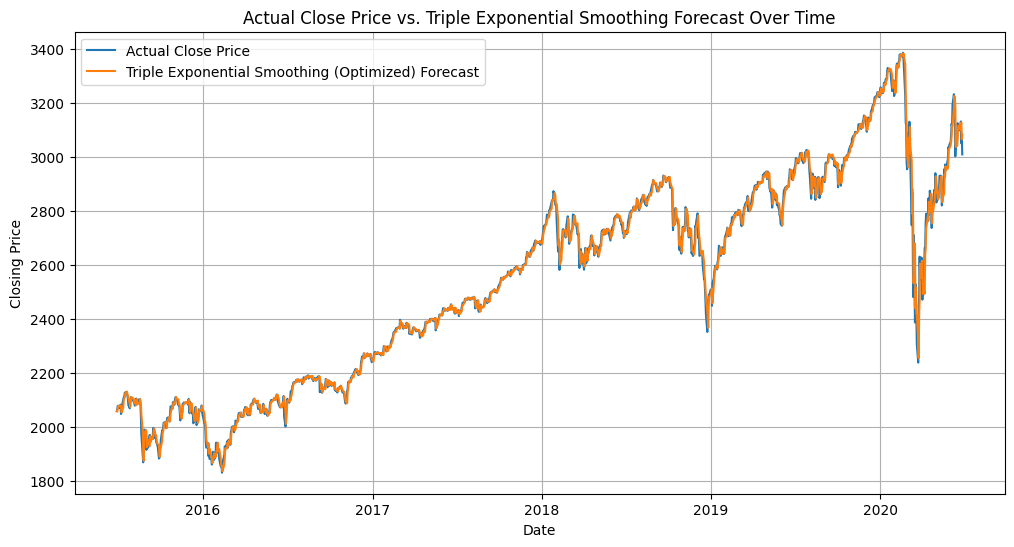

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, df['TES_Optimized_Forecast'], label='Triple Exponential Smoothing (Optimized) Forecast')
plt.title('Actual Close Price vs. Triple Exponential Smoothing Forecast Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

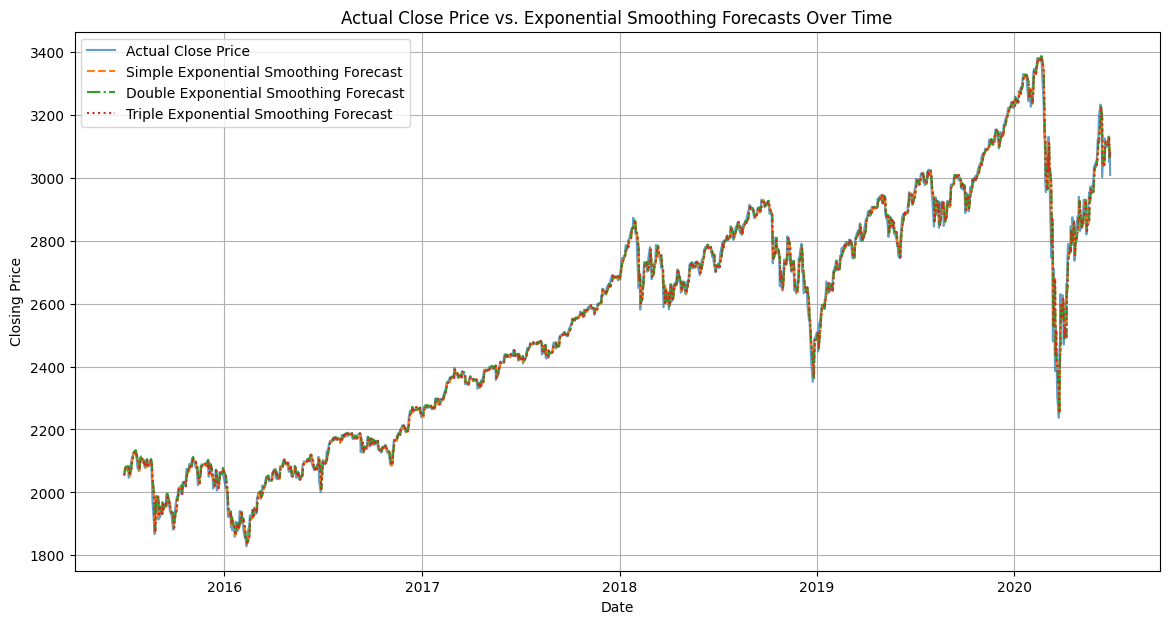

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price', alpha=0.7)
plt.plot(df.index, df['SES_Optimized_Forecast'], label='Simple Exponential Smoothing Forecast', linestyle='--')
plt.plot(df.index, df['DES_Optimized_Forecast'], label='Double Exponential Smoothing Forecast', linestyle='-.')
plt.plot(df.index, df['TES_Optimized_Forecast'], label='Triple Exponential Smoothing Forecast', linestyle=':')
plt.title('Actual Close Price vs. Exponential Smoothing Forecasts Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df['Close'])

# Extract and print the results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret the results
if adf_result[1] <= 0.05:
    print("\nInterpretation: The p-value is less than or equal to 0.05, so we reject the null hypothesis.")
    print("The time series is likely stationary.")
else:
    print("\nInterpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("The time series is likely non-stationary.")

ADF Statistic: -1.4915624293581178
p-value: 0.5376810786440258
Critical Values:
   1%: -3.4355964295197743
   5%: -2.863856825923603
   10%: -2.5680035060041626

Interpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis.
The time series is likely non-stationary.


In [41]:
# Apply a first-order difference to the 'Close' column
df['Close_Difference'] = df['Close'].diff(periods=1)

# Display the head of the DataFrame to see the new column
print("DataFrame head with First-Order Difference:")
display(df.head())

# Note: The first value of 'Close_Difference' will be NaN.

DataFrame head with First-Order Difference:


,Close,Naive_Forecast,3_day_MA,5_day_MA,7_day_MA,SES_Optimized_Forecast,DES_Optimized_Forecast,TES_Optimized_Forecast,Close_Difference
Date,,,,,,,,,
2015-06-29,2057.639893,NaN,NaN,NaN,NaN,2057.639893,2063.110107,2056.787348,NaN
2015-06-30,2063.110107,2057.639893,NaN,NaN,NaN,2057.639893,2064.021777,2056.041045,5.470214
2015-07-01,2077.419922,2063.110107,2066.056641,NaN,NaN,2062.164863,2068.714513,2063.345637,14.309815
2015-07-02,2076.780029,2077.419922,2072.436686,NaN,NaN,2074.783873,2081.418581,2076.431775,-0.639893
2015-07-06,2068.760010,2076.780029,2074.319987,2068.741992,NaN,2076.435097,2083.030846,2076.824808,-8.020019


In [42]:
from statsmodels.tsa.stattools import adfuller

# Drop NaN values from the differenced series before performing the ADF test
adf_result_diff = adfuller(df['Close_Difference'].dropna())

# Extract and print the results
print(f'ADF Statistic (Differenced): {adf_result_diff[0]}')
print(f'p-value (Differenced): {adf_result_diff[1]}')
print('Critical Values (Differenced):')
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value}')

# Interpret the results
if adf_result_diff[1] <= 0.05:
    print("\nInterpretation: The p-value is less than or equal to 0.05, so we reject the null hypothesis.")
    print("The differenced time series is likely stationary.")
else:
    print("\nInterpretation: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("The differenced time series is likely non-stationary.")

ADF Statistic (Differenced): -10.320537454139478
p-value (Differenced): 3.0172226175217365e-18
Critical Values (Differenced):
   1%: -3.4355964295197743
   5%: -2.863856825923603
   10%: -2.5680035060041626

Interpretation: The p-value is less than or equal to 0.05, so we reject the null hypothesis.
The differenced time series is likely stationary.


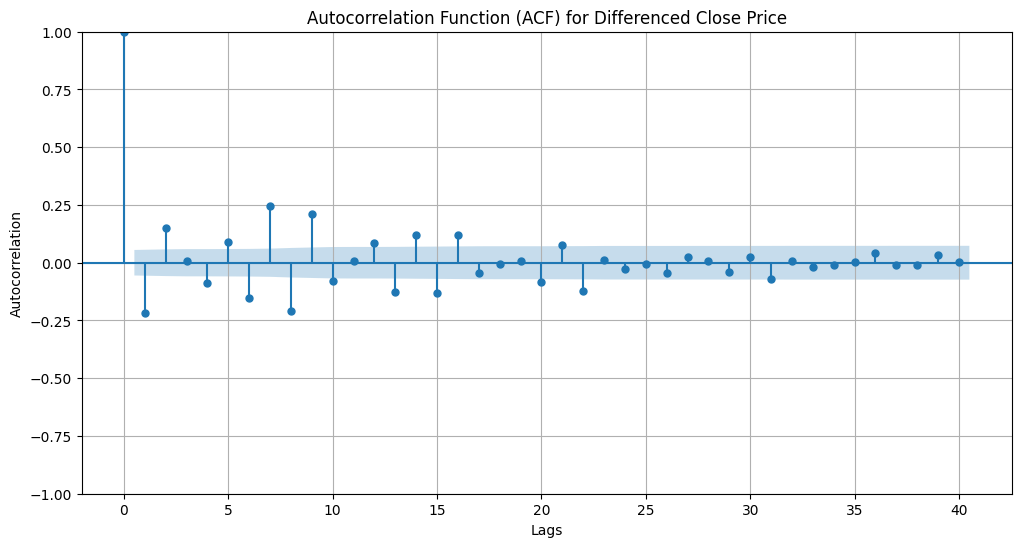

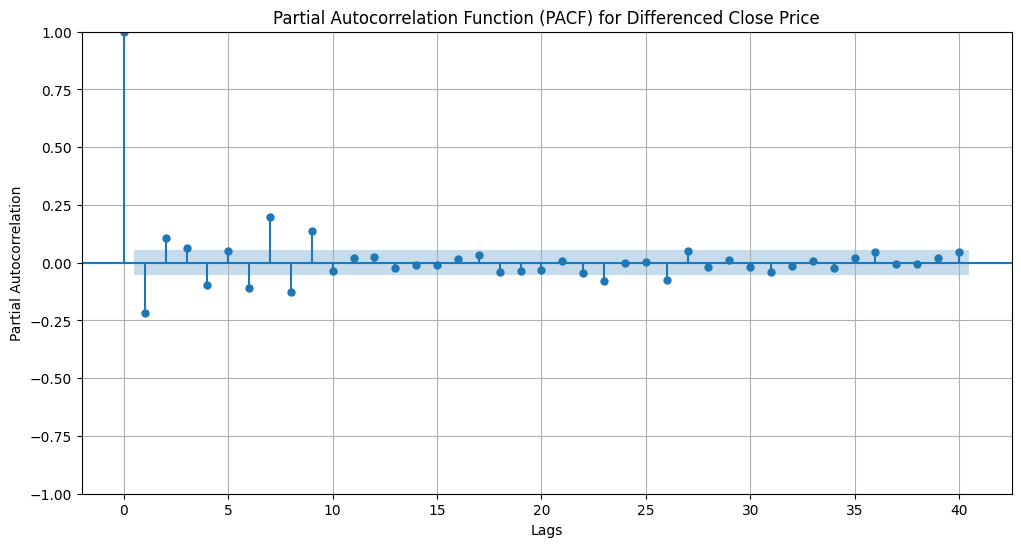

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NaN values before plotting ACF and PACF
differenced_data = df['Close_Difference'].dropna()

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(differenced_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Close Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(differenced_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [88]:
!pip uninstall numpy -y
!pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires opencv-python>=3.4.8.29, which is not installed.
spacy 3.8.7 requires thinc<8.4.0,>=8.3.4, which is not installed.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.


In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/SP_500.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.set_index('Date', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Close
Date,
2015-06-29,2057.639893
2015-06-30,2063.110107
2015-07-01,2077.419922
2015-07-02,2076.780029
2015-07-06,2068.760010


In [3]:
from pmdarima import auto_arima

# Use auto_arima to find the best ARIMA model
# seasonal=False is used as we did not observe strong seasonality in the initial plots
# stepwise=True uses the stepwise algorithm to speed up the search
# suppress_warnings=True suppresses convergence warnings
auto_arima_model = auto_arima(df['Close'], seasonal=False, stepwise=True, suppress_warnings=True)

# Print the summary of the best model
print(auto_arima_model.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1252
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6013.773
Date:                Thu, 11 Sep 2025   AIC                          12039.545
Time:                        14:38:52   BIC                          12070.336
Sample:                             0   HQIC                         12051.120
                               - 1252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7053      0.029    -57.956      0.000      -1.763      -1.648
ar.L2         -0.8336      0.041    -20.151      0.000      -0.915      -0.753
ar.L3          0.0277      0.018      1.560      0.1

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1, 1, 1) model
# The order (p, d, q) is (1, 1, 1) based on the ACF and PACF plots of the differenced data
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

# Add the fitted values (forecasts) as a new column to the DataFrame, aligning by index
df['ARIMA_Forecast'] = arima_result.fittedvalues.reindex(df.index)

# Display the head of the DataFrame to see the new column
print("\nDataFrame head with ARIMA Forecast:")
display(df.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6070.942
Date:                Thu, 11 Sep 2025   AIC                          12147.883
Time:                        14:38:52   BIC                          12163.278
Sample:                             0   HQIC                         12153.671
                               - 1252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4450      0.035    -12.857      0.000      -0.513      -0.377
ma.L1          0.2329      0.038      6.055      0.000       0.158       0.308
sigma2       960.8400     12.092     79.458      0.0

,Close,ARIMA_Forecast
Date,,
2015-06-29,2057.639893,0.000000
2015-06-30,2063.110107,2057.171781
2015-07-01,2077.419922,2061.985738
2015-07-02,2076.780029,2074.636892
2015-07-06,2068.760010,2077.563790


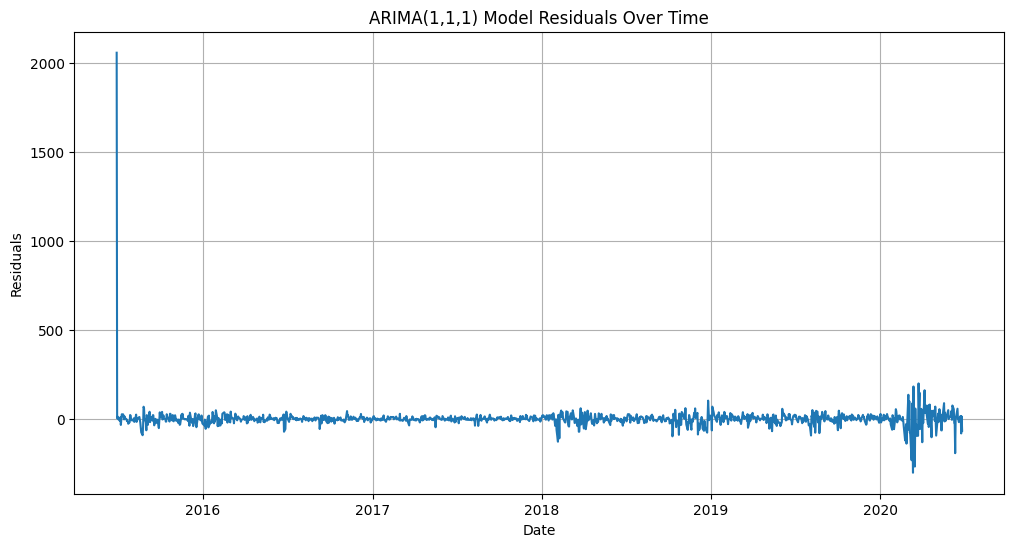

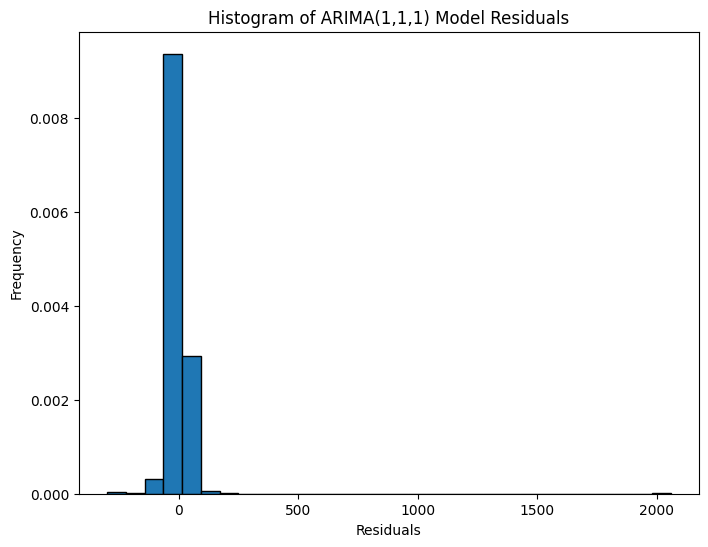

<Figure size 600x600 with 0 Axes>

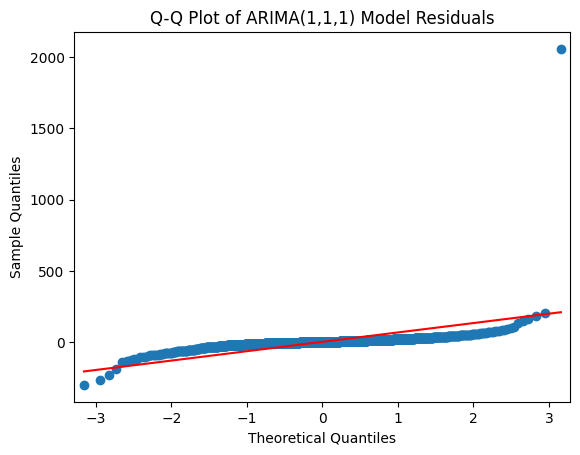

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calculate residuals
residuals = arima_result.resid

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA(1,1,1) Model Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, edgecolor='black')
plt.title('Histogram of ARIMA(1,1,1) Model Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of ARIMA(1,1,1) Model Residuals')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Drop rows with NaN values in 'ARIMA_Forecast'
df_eval_arima = df.dropna(subset=['ARIMA_Forecast'])

# Calculate MSE for ARIMA Forecast
mse_arima = mean_squared_error(df_eval_arima['Close'], df_eval_arima['ARIMA_Forecast'])
print(f"Mean Squared Error (MSE) for ARIMA(1,1,1): {mse_arima}")

# Calculate RMSE for ARIMA Forecast
rmse_arima = np.sqrt(mse_arima)
print(f"Root Mean Squared Error (RMSE) for ARIMA(1,1,1): {rmse_arima}")

# Calculate MAPE for ARIMA Forecast
# Avoid division by zero in MAPE calculation
mape_arima = np.mean(np.abs((df_eval_arima['Close'] - df_eval_arima['ARIMA_Forecast']) / df_eval_arima['Close'])) * 100
print(f"Mean Absolute Percentage Error (MAPE) for ARIMA(1,1,1): {mape_arima}%")

Mean Squared Error (MSE) for ARIMA(1,1,1): 4341.780006852824
Root Mean Squared Error (RMSE) for ARIMA(1,1,1): 65.89218471755831
Mean Absolute Percentage Error (MAPE) for ARIMA(1,1,1): 0.7917083764476865%


In [49]:
# Create a dictionary to store the evaluation metrics
performance_metrics = {
    'Naive Forecast': {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    },

    '3-day Moving Average': {
        'MSE': mse_ma,
        'RMSE': rmse_ma,
        'MAPE': mape_ma
    },
    '5-day Moving Average': {
        'MSE': mse_ma_5,
        'RMSE': rmse_ma_5,
        'MAPE': mape_ma_5
    },
    '7-day Moving Average': {
        'MSE': mse_ma_7,
        'RMSE': rmse_ma_7,
        'MAPE': mape_ma_7
    },
    'Simple Exponential Smoothing': {
        'MSE': mse_ses,
        'RMSE': rmse_ses,
        'MAPE': mape_ses
    },
    'Double Exponential Smoothing': {
        'MSE': mse_des,
        'RMSE': rmse_des,
        'MAPE': mape_des
    },
    'Triple Exponential Smoothing': {
        'MSE': mse_tes,
        'RMSE': rmse_tes,
        'MAPE': mape_tes
    },
    'ARIMA(1, 1, 1)': {
        'MSE': mse_arima,
        'RMSE': rmse_arima,
        'MAPE': mape_arima
    }
}

# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame(performance_metrics).T

# Display the evaluation DataFrame
display(evaluation_df)

,MSE,RMSE,MAPE
Naive Forecast,1009.933257,31.779447,0.710472
3-day Moving Average,463.653918,21.532624,0.510988
5-day Moving Average,997.539369,31.583847,0.763164
7-day Moving Average,1532.150037,39.142688,0.946981
Simple Exponential Smoothing,971.409743,31.167447,0.709798
Double Exponential Smoothing,977.658871,31.267537,0.711606
Triple Exponential Smoothing,969.189016,31.131801,0.707680
"ARIMA(1, 1, 1)",4341.780007,65.892185,0.791708


# **Best Model for Forecasting**

Based on the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) calculated for the implemented forecasting models, the 3-Day Moving Average model performed the best on this dataset.


The evaluation metrics are summarized in the table below:

| Model                     | MSE         | RMSE       | MAPE     |
|---------------------------|-------------|------------|----------|
| Naive Forecast            | 1009.933257 | 31.779447  | 0.710472 |
| 3-day Moving Average      | 463.653918  | 21.532624  | 0.510988 |
| 5-day Moving Average      | 997.539369  | 31.583847  | 0.763164 |
| 7-day Moving Average      | 1532.150037 | 39.142688  | 0.946981 |
| Simple Exponential Smoothing | 971.409743 | 31.167447 | 0.709798 |
| Double Exponential Smoothing | 977.658871 | 31.267537 | 0.711606 |
| Triple Exponential Smoothing | 969.189016 | 31.131801 | 0.707680 |
| ARIMA(1, 1, 1)           | 4341.780007 | 65.892185  | 0.791708 |

The 3-Day Moving Average model exhibited the lowest values across all three error metrics, indicating a closer fit to the actual data compared to the other models evaluated in this analysis.
